In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

from torchvision import datasets, transforms
import matplotlib.pyplot as plt

plt.style.use(style='seaborn')


In [2]:
apply_transforms= transforms.Compose([transforms.Resize(32),transforms.ToTensor()])
Batchsize=256

trainset= datasets.MNIST(root='./data',
                        train=True,
                        download=True,
                        transform=apply_transforms)
trainloader= torch.utils.data.DataLoader(trainset,
                                batch_size=Batchsize,
                                shuffle=True)

testset= datasets.MNIST(root='./data',
                        train=False,
                        download=True,
                        transform=apply_transforms)
testloader= torch.utils.data.DataLoader(testset,
                                batch_size=Batchsize,
                                shuffle=False)

In [3]:
print(len(trainset))
print(len(testset))

60000
10000


In [4]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        self.conv1=nn.Conv2d(1, 6, 5)
        self.pool1=nn.MaxPool2d(2, stride=2)
        self.conv2=nn.Conv2d(6, 16, 5)
        self.pool2=nn.MaxPool2d(2, stride=2)
        self.fc1=nn.Linear(16*5*5, 120)
        self.fc2=nn.Linear(120, 84)
        self.fc3=nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x

In [5]:
model=LeNet()
print(model)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [6]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
num_epochs = 50

optimizer = torch.optim.SGD(model.parameters(),
                        lr=learning_rate,
                        momentum=0.9)

In [7]:
train_loss =[]
train_acc =[]
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0

    ## training step
    for i, data in enumerate(trainloader):
        inputs, labels =data

        outputs = model(inputs)
        optimizer.zero_grad()
        preds = torch.argmax(outputs, dim=1)
        loss = criterion(outputs, labels)
        running_loss += loss

        running_acc += torch.sum(preds==labels)
        
    total_loss = running_loss/(i+1) 
    total_loss.backward()
    ## update model params
    optimizer.step()
    
    epoch_loss = running_loss.item()/(i+1)
    epoch_acc = running_acc.item()/60000

    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)

    
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.4f' \
          %(epoch, epoch_loss, epoch_acc))

Epoch: 0 | Loss: 2.3027 | Train Accuracy: 0.1522
Epoch: 1 | Loss: 2.3027 | Train Accuracy: 0.1528
Epoch: 2 | Loss: 2.3027 | Train Accuracy: 0.1541
Epoch: 3 | Loss: 2.3027 | Train Accuracy: 0.1558
Epoch: 4 | Loss: 2.3027 | Train Accuracy: 0.1581
Epoch: 5 | Loss: 2.3027 | Train Accuracy: 0.1603
Epoch: 6 | Loss: 2.3027 | Train Accuracy: 0.1630
Epoch: 7 | Loss: 2.3027 | Train Accuracy: 0.1656
Epoch: 8 | Loss: 2.3026 | Train Accuracy: 0.1681
Epoch: 9 | Loss: 2.3026 | Train Accuracy: 0.1707
Epoch: 10 | Loss: 2.3026 | Train Accuracy: 0.1731
Epoch: 11 | Loss: 2.3026 | Train Accuracy: 0.1748
Epoch: 12 | Loss: 2.3025 | Train Accuracy: 0.1767
Epoch: 13 | Loss: 2.3025 | Train Accuracy: 0.1783
Epoch: 14 | Loss: 2.3025 | Train Accuracy: 0.1795
Epoch: 15 | Loss: 2.3025 | Train Accuracy: 0.1809
Epoch: 16 | Loss: 2.3024 | Train Accuracy: 0.1820
Epoch: 17 | Loss: 2.3024 | Train Accuracy: 0.1825
Epoch: 18 | Loss: 2.3024 | Train Accuracy: 0.1832
Epoch: 19 | Loss: 2.3024 | Train Accuracy: 0.1840
Epoch: 20 

Text(0, 0.5, 'Training Accuracy')

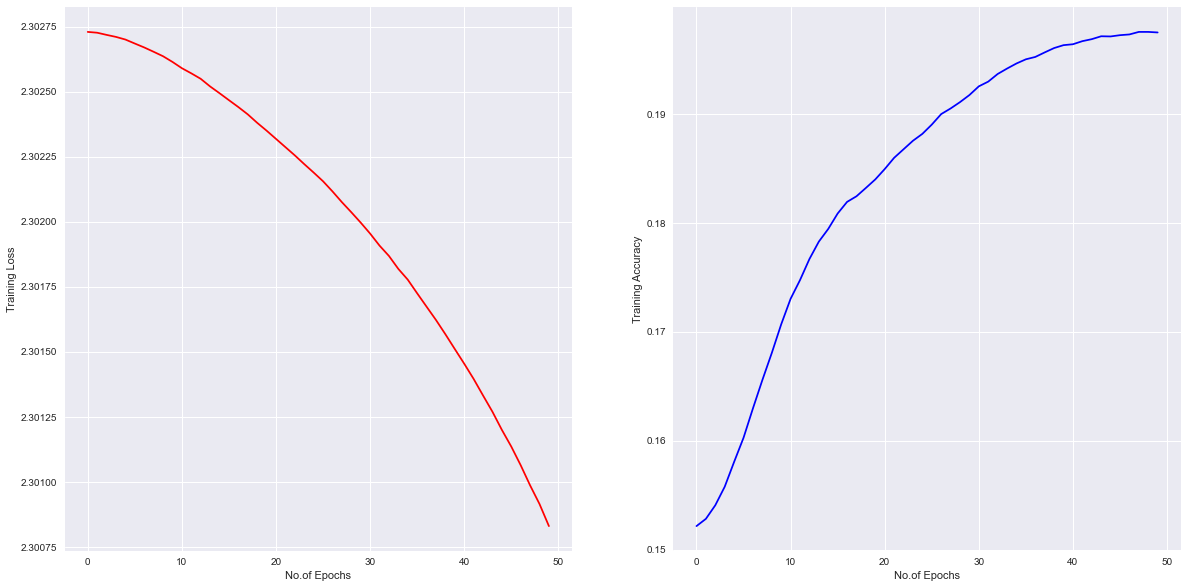

In [8]:
fig = plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(range(num_epochs),train_loss, "r", label="Batchsize=10" )

plt.xlabel("No.of Epochs")
plt.ylabel("Training Loss")
plt.subplot(122)
plt.plot(range(num_epochs),train_acc, "b", label="Batchsize=10" )

plt.xlabel("No.of Epochs")
plt.ylabel("Training Accuracy")

In [9]:
test_acc = 0.0
test_run_loss = 0.0
test_run_acc = 0.0
for i, data in enumerate(testloader):
    inputs, labels =data
    inputs = inputs
    labels = labels

    outputs = model(inputs)
    preds = torch.argmax(outputs, dim=1)
    loss = criterion(outputs, labels)
    test_run_loss += loss
   
    test_run_acc += torch.sum(preds==labels)

test_loss = test_run_loss.item()/(i+1)
test_acc = test_run_acc.item()/10000
    
print('Test Loss: %.4f| Test Accuracy: %.4f' %(test_loss, test_acc))

Test Loss: 2.3008| Test Accuracy: 0.1950
